In [20]:
#loading keras library
rm(list=ls())
library(keras)
library(arules)
#loading the keras inbuilt mnist dataset
data<-dataset_mnist()
#print(data)
#separating train and test file
train_x<-data$train$x
train_y<-data$train$y
test_x<-data$test$x
test_y<-data$test$y

rm(data)

# converting a 2D array into a 1D array for feeding into the MLP and normalising the matrix
train_x <- array(train_x, dim = c(dim(train_x)[1], prod(dim(train_x)[-1]))) / 255
test_x <- array(test_x, dim = c(dim(test_x)[1], prod(dim(test_x)[-1]))) / 255
#print(train_x)
#print(test_x)


#converting the target variable to once hot encoded vectors using keras inbuilt function
train_y<-to_categorical(train_y,10)
test_y<-to_categorical(test_y,10)
#print(train_y)
#print(test_y)


#defining a keras sequential model - KERAS
model <- keras_model_sequential()
print(model)
#defining the model with 1 input layer[784 neurons], 1 hidden layer[784 neurons] with dropout rate 0.4 and 1 output layer[10 neurons]
#i.e number of digits from 0 to 9

model %>% 
  layer_dense(units = 784, input_shape = 784) %>% 
  layer_dropout(rate=0.4)%>%
  layer_activation(activation = 'relu') %>% 
  layer_dense(units = 10) %>% 
  layer_activation(activation = 'softmax')

print(model)
#compiling the defined model with metric = accuracy and optimiser as adam.
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = 'adam',
  metrics = c('accuracy')
)
print(model)
#fitting the model on the training dataset
model %>% fit(train_x, train_y, epochs = 10, batch_size = 128)

#Evaluating model on the cross validation dataset
loss_and_metrics <- model %>% evaluate(test_x, test_y, batch_size = 128)
print(loss_and_metrics)

#print(model)



         [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
    [1,]    0    0    0    0    0    1    0    0    0     0
    [2,]    1    0    0    0    0    0    0    0    0     0
    [3,]    0    0    0    0    1    0    0    0    0     0
    [4,]    0    1    0    0    0    0    0    0    0     0
    [5,]    0    0    0    0    0    0    0    0    0     1
    [6,]    0    0    1    0    0    0    0    0    0     0
    [7,]    0    1    0    0    0    0    0    0    0     0
    [8,]    0    0    0    1    0    0    0    0    0     0
    [9,]    0    1    0    0    0    0    0    0    0     0
   [10,]    0    0    0    0    1    0    0    0    0     0
   [11,]    0    0    0    1    0    0    0    0    0     0
   [12,]    0    0    0    0    0    1    0    0    0     0
   [13,]    0    0    0    1    0    0    0    0    0     0
   [14,]    0    0    0    0    0    0    1    0    0     0
   [15,]    0    1    0    0    0    0    0    0    0     0
   [16,]    0    0    0    0    0    0  

         [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
    [1,]    0    0    0    0    0    0    0    1    0     0
    [2,]    0    0    1    0    0    0    0    0    0     0
    [3,]    0    1    0    0    0    0    0    0    0     0
    [4,]    1    0    0    0    0    0    0    0    0     0
    [5,]    0    0    0    0    1    0    0    0    0     0
    [6,]    0    1    0    0    0    0    0    0    0     0
    [7,]    0    0    0    0    1    0    0    0    0     0
    [8,]    0    0    0    0    0    0    0    0    0     1
    [9,]    0    0    0    0    0    1    0    0    0     0
   [10,]    0    0    0    0    0    0    0    0    0     1
   [11,]    1    0    0    0    0    0    0    0    0     0
   [12,]    0    0    0    0    0    0    1    0    0     0
   [13,]    0    0    0    0    0    0    0    0    0     1
   [14,]    1    0    0    0    0    0    0    0    0     0
   [15,]    0    1    0    0    0    0    0    0    0     0
   [16,]    0    0    0    0    0    1  

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
Total params: 0
Trainable params: 0
Non-trainable params: 0
________________________________________________________________________________


Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_7 (Dense)                     (None, 784)                     615440      
________________________________________________________________________________
dropout_4 (Dropout)                 (None, 784)                     0           
________________________________________________________________________________
activation_7 (Activation)           (None, 784)                     0           
________________________________________________________________________________
dense_8 (Dense)                    

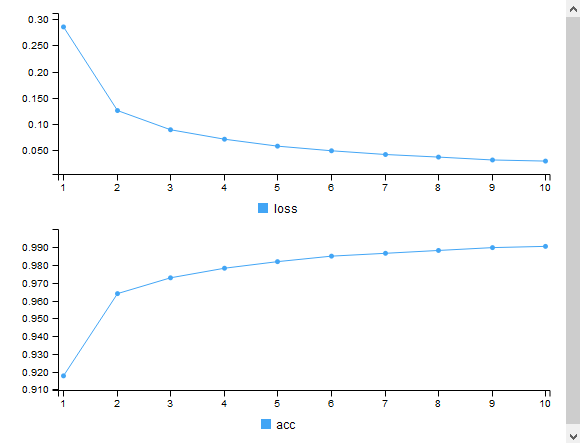

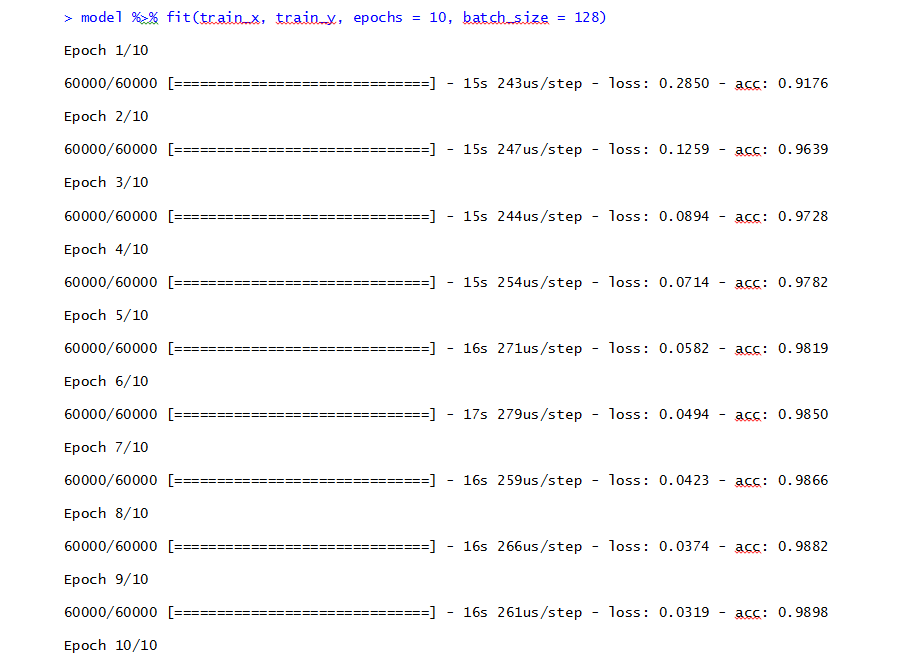